In [28]:
import random
import math
import pandas as pd
import numpy as np
import numpy.random as rnd
import scipy.stats as st

In [29]:
#create a random number generator and call it rng
rng = rnd.default_rng(1) #let random seed be 1

In [30]:
#generate 100,000 observations of Tx0 knowing that Tx0 is an exponential distribution with lambda = 0.065
lamb = 0.065
tx0 = []
for i in range(100000):
   tx0.append(rng.exponential(scale=1/lamb))

In [31]:
df = pd.DataFrame(tx0, columns=['tx0'])
df.head()

,tx0
0,16.508139
1,4.745433
2,82.699029
3,5.637340
4,1.774801


In [32]:
#generate the corresponding destination state. We know that
# P(disabled | Tx0 = t) = 5/13
# P(dead | Tx0 = t) = 8/13
random.seed(1)
destination = []
choice = [1,2]
for i in range(100000):
    destination.extend(random.choices(choice, weights=(5/13, 8/13), k=1))

In [33]:
df['destination'] = destination
df['destination'] = df['destination'].astype(int)

In [34]:
df.head(5)

,tx0,destination
0,16.508139,1
1,4.745433,2
2,82.699029,2
3,5.637340,1
4,1.774801,2


In [35]:
#generate 100,000 observations of Tx1 knowing that Tx0 is an exponential distribution with lambda = 0.05
lamb1 = 0.05
tx1 = []
for i in range(100000):
    tx1.append(rng.exponential(scale=1/lamb1))
df['tx1'] = tx1
df.head()

,tx0,destination,tx1
0,16.508139,1,16.528829
1,4.745433,2,6.915302
2,82.699029,2,25.654862
3,5.637340,1,5.600636
4,1.774801,2,7.000690


In [36]:
#df_copy = df.copy()

In [37]:
#for all obs that have destination = 2 we set tx1 = 0
df.loc[df['destination'] == 2, 'tx1'] = 0
df.head(100)

,tx0,destination,tx1
0,16.508139,1,16.528829
1,4.745433,2,0.000000
2,82.699029,2,0.000000
3,5.637340,1,5.600636
4,1.774801,2,0.000000
...,...,...,...
95,5.747140,2,0.000000
96,17.008711,2,0.000000
97,30.418828,2,0.000000
98,9.646355,2,0.000000


In [38]:
def present_value(df):
    if df['destination'] == 1:
        val = 1000*((1 - np.exp(df['tx1']*(-0.06))) / 0.06)*np.exp(df['tx0']*(-0.06))
    else:
        val = 10000*np.exp(df['tx0']*(-0.06))
    return val

In [39]:
df['Present Value of Z'] = df.apply(present_value, axis =1 )

In [40]:
df.head(10)

,tx0,destination,tx1,Present Value of Z
0,16.508139,1,16.528829,3893.865880
1,4.745433,2,0.000000,7522.203501
2,82.699029,2,0.000000,69.993238
3,5.637340,1,5.600636,3391.666345
4,1.774801,2,0.000000,8989.858035
5,27.689186,2,0.000000,1898.822462
6,7.671371,2,0.000000,6311.054945
7,8.483406,2,0.000000,6010.937613
8,0.457130,1,9.997835,7315.201097
9,11.754870,1,1.341720,636.786316


<AxesSubplot:>

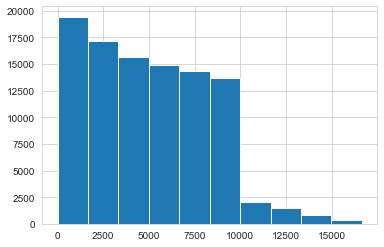

In [41]:
#The histogram of the PV of Z
df['Present Value of Z'].hist()

In [42]:
dfs = np.array_split(df, 400)

In [43]:
type(dfs)

list

In [44]:
dfs[0]

,tx0,destination,tx1,Present Value of Z
0,16.508139,1,16.528829,3893.865880
1,4.745433,2,0.000000,7522.203501
2,82.699029,2,0.000000,69.993238
3,5.637340,1,5.600636,3391.666345
4,1.774801,2,0.000000,8989.858035
...,...,...,...,...
245,0.643984,1,14.234889,9209.378209
246,14.262147,2,0.000000,4249.733555
247,28.806092,1,11.627129,1486.402261
248,5.547869,1,14.677309,6995.159977


In [45]:
mean_z = []
for i in range(400):
    mean = dfs[i]['Present Value of Z'].mean()
    mean_z.append(mean)
mean_z

[4797.9483173159915,
 5341.668848610102,
 4945.574701404673,
 5156.525448440598,
 4742.391079211908,
 5102.688629182211,
 4973.486909390576,
 5261.142821394488,
 5192.988067385703,
 5044.569458772213,
 5397.077608592871,
 4997.947778247256,
 5287.1682650253615,
 4699.46419498954,
 5321.302820158674,
 4584.312558783891,
 5163.3738950872485,
 4653.555289062477,
 5209.503166203955,
 4786.334545496601,
 4963.410148243624,
 5131.599036902791,
 4807.509497339802,
 5014.144297685287,
 4930.898810947728,
 4789.265540390585,
 5151.07589143654,
 5313.853228265693,
 4878.949962306154,
 4962.1969010034445,
 4901.612246640671,
 4715.645281623526,
 5215.724327507272,
 5037.0835998730145,
 4631.045057866295,
 5520.751872078163,
 5000.745033352654,
 4896.639782932897,
 5317.471616502354,
 4669.960476909181,
 4720.561623531435,
 5152.014554267124,
 4987.704888933107,
 5126.768395246833,
 5076.117047478638,
 5233.814624212967,
 5035.9543373430115,
 5479.066959283663,
 4603.948135340971,
 5192.2976566534

In [46]:
len(mean_z)

400

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

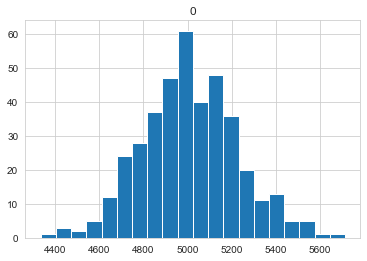

In [47]:
#histogram of Z_, we can see that the distribution of Z_ is approximately normal (bell shape)
mean_z = pd.DataFrame(mean_z)
mean_z.hist(bins=20)

In [48]:
#estimate the variance of Z_
mean_mean_z = mean_z.mean()
mean_mean_z

0    5010.746482
dtype: float64

In [49]:
#estimate the mean and variance of Z_
sd_mean_z = mean_z.std()
sd_mean_z

0    217.394691
dtype: float64

In [50]:
#95% confidence interval of the EPV of the benefit
def ci(x, sd, n):
    upper = x + 1.965*(sd/math.sqrt(n))
    lower = x - 1.965*(sd/math.sqrt(n))
    return lower, upper
ci(mean_mean_z, sd_mean_z, 400)

(0    4989.387454
 dtype: float64,
 0    5032.10551
 dtype: float64)

In [51]:
#df_copy.head()

In [52]:
df['tx'] = df['tx0'] + df['tx1']
df.head()

,tx0,destination,tx1,Present Value of Z,tx
0,16.508139,1,16.528829,3893.865880,33.036968
1,4.745433,2,0.000000,7522.203501,4.745433
2,82.699029,2,0.000000,69.993238,82.699029
3,5.637340,1,5.600636,3391.666345,11.237976
4,1.774801,2,0.000000,8989.858035,1.774801


In [53]:
df['tx'].mean()

22.916639773362512

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

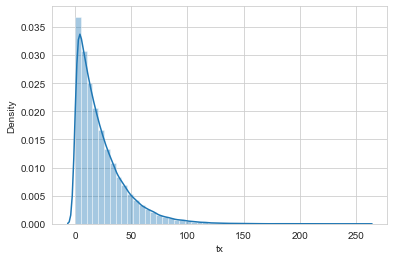

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(a=df['tx'])
plt.show